# Introduction
Hello people, welcome to this kernel&tutorial. Nowadays I've started to learn **boosting algorithms** and wanted to write a simple (implementation-oriented) tutorial about first succesfull boosting algorithm: **Adaboost**

After this kernel, you will have been:
* Learnt how Adaboost and Boosting classifiers work
* Learnt how to train a Adaboost Classifier with Decision Trees
* Learnt what is Bag of Words and what is the disadvanteges of it
* Learnt what is TF-IDF and how to implement it using sklearn 
* How to save a sklearn model and vectorizer using python pickle

# Notebook Content

## Theory
* Simply Explained: Adaboost Classifier
* Simply Explained: Bag of Words (BoW)
* Simply Explained: TF-IDF Vectorization


## Implementation
* Preparing Environment
* Step 1: Data Analyses
* Step 2: Cleaning Text
* Step 3: Implementing TF-IDF
* Step 4: Building and Training Adaboost Classifier
* Step 5: Saving Model and Defining Test Function


# Theory
In this main section, we will cover how things works. I won't explain everything in depth, you can learn the details from articles, main subject of this kernel will be to make you understand concepts such as TF-IDF

I will explain everything with graphs that drawn on **MS Paint :)**

## Simply Explained: Adaboost Classifier

Adaboost is the first succesfull boosting algorithm that invented in 1996 by **Robert Schapire and Yoav Freund**. Probably you ask, great but what is a boosting algorithm?

Gradient boosting based classifiers are classifiers to create a strong classifier using many weak learners. I know this was a confusing sentence. Let me show you how it works with 2-D charts.

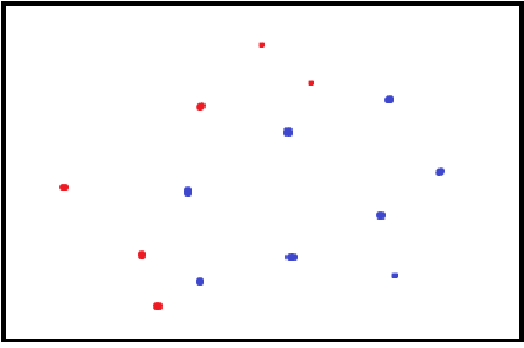

* This is our dataset contains two class, the blue ones are class A and others are class B.
* We want to classify them just using simple vertical and horizontal lines, such as:


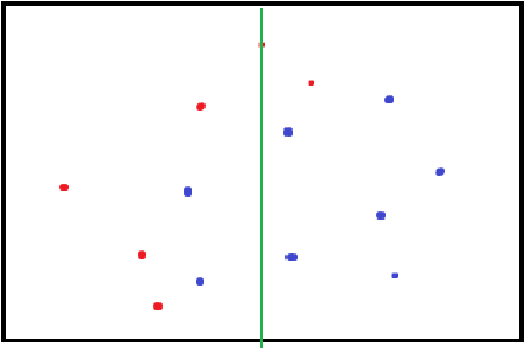
* But this is a bad line, let's start. As we can see, most of the left side of chart contains class B dots, so we can draw a vertical line to split most of class B dots. 

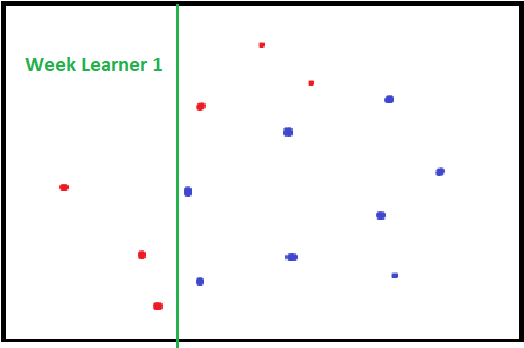
* Yea, **weak learner** concept is just that, probably you know we can do it with a decision tree.
* But still we need more **weak learner**, as you can see most of the points above is B, so we can draw a **weak learner** to there.

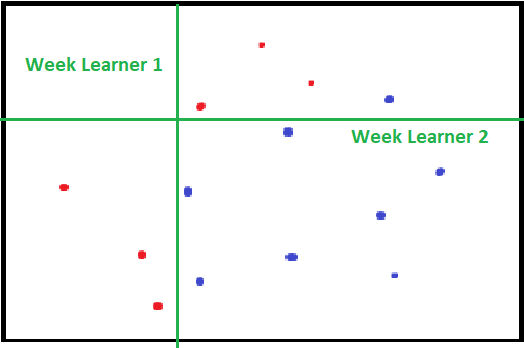
* Almost ready, now we just need to rescue the blue point at above.

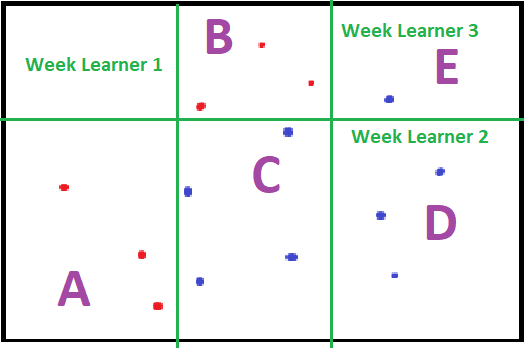
* Finally, we finished training our classifier with three decision tree estimator (week learner). If a dot is in zone A or zone B, it must be class B
* And if a dot is in zone C,D or E, its class must be A

Everything you need to get started with Adaboost is over, you can (should) learn details from Articles, let's move on to the text feature extraction methods.



## Simply Explained: Bag of Words
To understand why TF-IDF feature extraction important, I must explain what is Bag of Words (BOW) feature extraction. 

In bag of words approach, we'll create a sparse matrix (a matrix which most of the elements are zero) using sentences. Each future will be a word, let's take a look at the example below:

We have a dataset that contains that 6 sentences:
* Today I am going to study data science
* Tomorrow you will go
* I am interested in data science
* You was a good man
* I just wanted to be a good man
* Are you interested in statistics?

I've said each word will be feature, so our features will be:

    TODAY I AM GO STUDY DATA SCIENCE TOMORROW YOU WILL INTERESTED IN WAS GOOD MAN JUST WANT BE ARE STATISTICS
    
If the sentence given contains the feature, its value will be 1 and if not its value will be 0. Let's create our Bag of Words vectors

        TODAY I AM GO STUDY DATA SCIENCE TOMORROW YOU WILL INTERESTED IN WAS GOOD MAN JUST WANT BE ARE STATISTICS
    1     1   1  1  1  1     1     1      0         0  0        0      0   0   0    0   0    0   0  0    0
    2     0   0  0  1  0     0     0      1         1  1        0      0   0   0    0   0    0   0  0    0
    3     0   1  1  0  0     1     1      0         0  0        1      1   0   0    0   0    0   0  0    0
    4     0   0  0  0  0     0     0      0         1  0        0      0   1   1    1   0    0   0  0    0
    5     0   1  0  0  0     0     0      0         0  0        0      0   0   1    1   1    1   1  0    0
    6     0   0  0  0  0     0     0      0         1  0        0      1   0   0    0   0    0   0  1    1
    


First sentence is *Today I am going to study data science*, by matrix this sentence contains *today*,*I*,*am*,*go*,*study*,*data*,*science*. 

Bag of Words is just all about this, let's move on to the TF-IDF feature extraction.

# Simply Explained: Term Frequency x Inverse Document Frequency 

In previous section, we've learnt bag of words. In bag of words we've used binary features (features that show whether the sentence contain the word or not) but sometimes as you can predict it can cause real problems. 

In TFxIDF each future will be a word as well, but we won't use binary. We'll use a formula to determine TF-IDF score of feature.

=> The i feature's value of j sentence
#### TF-IDF Score: TF(i,j) * IDF(i)

**Term Frequency(i,j)** = How many times **i** word occurs in **j** / how many words are there in **j**

**Inverse Document Frequency(i)** = log2(number of sentences in dataset/ number of sentences that contains **i** word)

It's all about this, let's make an example. 

* We have dataset that contains 500 sentences and all the sentences contain **I** word. (What a selfish dataste ha!)
* Let's calculate TF-IDF score of **I** feature of sentence below:
        I am really interested in gradient boosting
   
* TF Score will be = 1/6
* Inverse Document will be = log2(500/500) = 0
* So it's TF-IDF score will be 0, it means **I** does not have a special meaning.

I hope you understand, let's start to implement.


# Implementation
In this main section we will implement everything that we learnt. Let's start!

## Preparing Environment
First, we'll import libraries, then we will load our dataset

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pickle
import seaborn as sns
import time

In [4]:
data = pd.read_csv('./data/all-data.csv',encoding="latin1", header=None)
data.columns = ["Label","Text"]
data.head()

,Label,Text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


## Step 1: Data Analyses
In this section we'll take a look at the data.

* Let's check whether are there any missing value or not

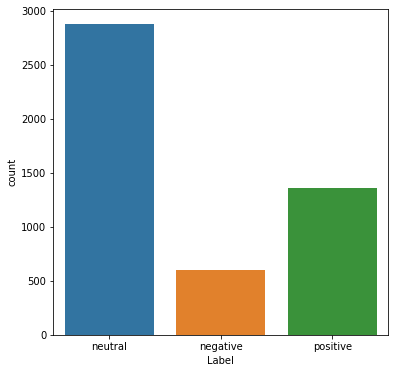

In [33]:
plt.subplots(figsize = (6,6))
sns.countplot(x=data['Label'])
plt.show()

* Dataset is unbalanced, most of the dataset is neutral as we can predict. 
* This may cause problems.

* Then let's take a look at the lenghts by class.

In [10]:
data.shape

(4846, 2)

In [14]:
%timeit [len(text) for text in data["Text"].values]

252 µs ± 62.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [16]:
data["len"] = [len(text) for text in data["Text"].values]

data.groupby("Label")["len"].mean()

Label
negative    125.756623
neutral     125.072247
positive    135.647836
Name: len, dtype: float64

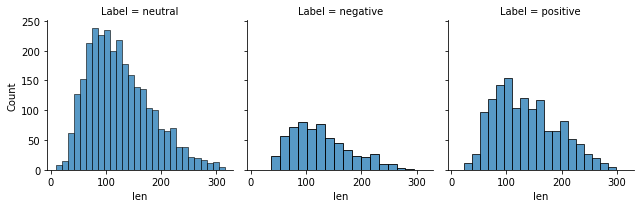

In [25]:
g = sns.FacetGrid(data, col = 'Label')
g.map(sns.histplot, 'len')

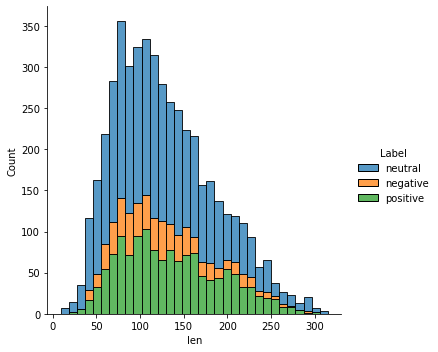

In [34]:
sns.displot(x='len', hue = 'Label', data = data, multiple = 'stack')
plt.show()

<AxesSubplot:xlabel='len', ylabel='Label'>

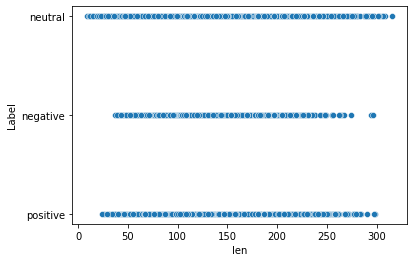

In [38]:
sns.scatterplot(x='len', y='Label', data = data)

* As we can see length of sentences are unrelated with classes.

Let's move on to the next section and preprocess the texts.

## Step 2: Cleaning Texts
In this section we'll clean the texts, in order to clean texts we will define a function.

In [58]:
from autocorrect import Speller
spell = Speller()
spell('i is a chinease, will jion the sohw')

'i is a chinese, will join the show'

In [59]:
nltk.word_tokenize('i is a chinease, will jion the shew')

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\wangu/nltk_data'
    - 'C:\\Users\\wangu\\AppData\\Local\\Programs\\Python\\Python310\\nltk_data'
    - 'C:\\Users\\wangu\\AppData\\Local\\Programs\\Python\\Python310\\share\\nltk_data'
    - 'C:\\Users\\wangu\\AppData\\Local\\Programs\\Python\\Python310\\lib\\nltk_data'
    - 'C:\\Users\\wangu\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [55]:
def cleanText(text):
    
    lemma = WordNetLemmatizer()
    stp = stopwords.words('english')
    
    # This means remove everything except alphabetical and numerical characters
    text = re.sub("[^a-zA-Z0-9]"," ",text)
    
    text = text.lower()
    
    # This mean split sentences by words ("I am good" => ["I","am","good"])
    text = nltk.word_tokenize(text)
    
    # Lemmatizers convert words to their base form using dictionaries (going => go, bees => be , dog => dog)
    text = [lemma.lemmatize(word) for word in text]
    
    # We should remove stopwords, stopwords are the words that has no special meaning such as I,You,Me,Was
    text = [word for word in text if word not in stp]
    
    # Everything is ready, now we just need join the elements of lists (["feel","good"] => "feel good")
    text = " ".join(text)
    
    return text

* Let's try our function

In [15]:
cleanText("Nowadays I am interested in traditional text feature extraction methods, because I want to learn foundations")

'nowadays interested traditional text feature extraction method want learn foundation'

* Now let's clean our entire texts.

In [17]:
start_time = time.time()
cleanedText = []
for text in data["Text"]:
    
    cleanedText.append(cleanText(text))
end_time = time.time()
process_time = round(end_time-start_time,2)

print("="*10)
print("Texts are cleaned, this process took {} seconds \n \n".format(process_time))

print(cleanedText[0])


Texts are cleaned, this process took 3.23 seconds 
 

according gran company ha plan move production russia although company growing


* Before moving on to the next section, let's encode our labels. Let negatives be 0, neutrals be 1 and positives be 2

In [22]:
data["Label"].value_counts()

neutral     2879
positive    1363
negative     604
Name: Label, dtype: int64

In [23]:
y = []
for label in data["Label"]:
    
    if label=="negative":
        y.append(0)
        
    elif label=="positive":
        y.append(2)
        
    elif label=="neutral":
        y.append(1)

y = np.asarray(y)

## Step 3: Implementing TF-IDF Vectorizing
In this section we'll vectorize our cleaned texts using TF-IDF approach.

In [28]:
# First, we need a vectorizer object
vectorizer = TfidfVectorizer(max_features=4000)
# This means just consider most used 4000 words

start = time.time()

x = vectorizer.fit_transform(cleanedText).toarray()

process_time = round(time.time()-start,2)

print("Vectorizing cleaned text using TF-IDF approach took {} seconds".format(process_time))

x.shape

Vectorizing cleaned text using TF-IDF approach took 0.3 seconds


(4846, 4000)

* Last step before modeling is splitting dataset into train and test.

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3876, 4000)
(970, 4000)
(3876,)
(970,)


# Step 4: Building and Training Adaboost Classifier
In this section we'll train our Adaboost classifier using vectorized texts.

In [30]:
# We'll use 100 weak learners to build a strong learner
classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100)

classifier.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

* And now let's test our classifier

Test set accuracy of our Adaboost Classifier is 71.55


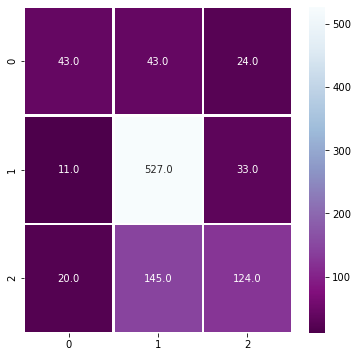

In [33]:
y_pred = classifier.predict(x_test)

print("Test set accuracy of our Adaboost Classifier is {}".format(round(accuracy_score(y_pred,y_test)*100,2)))

plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix(y_pred=y_pred,y_true=y_test),annot=True,fmt=".1f",linewidths=1.5,cmap="BuPu_r")
plt.show()

* Because of our dataset is unbalanced we could'nt train our classifier great.

## Step 5: Saving Model and Defining Test Function
In this section we'll save model and vectorizer using pickle object serialization and write a function that takes text as parameter and returns sentiment (neutral,positive,negative) 

In [34]:
pickle.dump(classifier,open("adaboost.pickle","wb"))
pickle.dump(vectorizer,open("vectorizer.pickle","wb"))
            

In [35]:
def analyseText(text):
    
    cls = pickle.load(open("adaboost.pickle","rb"))
    vct = pickle.load(open("vectorizer.pickle","rb"))
    
    # First we need to clean the text given
    text = cleanText(text)
    
    # Then we need to vectorize the text
    text = vct.transform([text])
    
    # And let's predict results using vector
    pred = cls.predict(text)
    
    decision = "neutral"
    
    if pred[0] == 0:
        decision = "negative"
        
    elif pred[0] == 2:
        decision = "positive"
        
    return decision
        

* Everything is ready let's use our function

In [38]:
analyseText("Rental of building equipment accounted for 88 percent of the operating income ")

'neutral'

In [42]:
analyseText("O'Leary 's Material Handling Services , located in Perth , is the leading company in Western Australia that supplies , installs and provides service for tail lifts .")


'positive'

# Conclusion
Thanks for your attention, if you have any question feel free to ask in comments. Also if you liked this kernel, please upvote to motivate me!

Have a great day!